# SVR

In [2]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## ph0100

c:\Users\gandh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  0.9820530861191482
RMSE:  0.4943907964382031


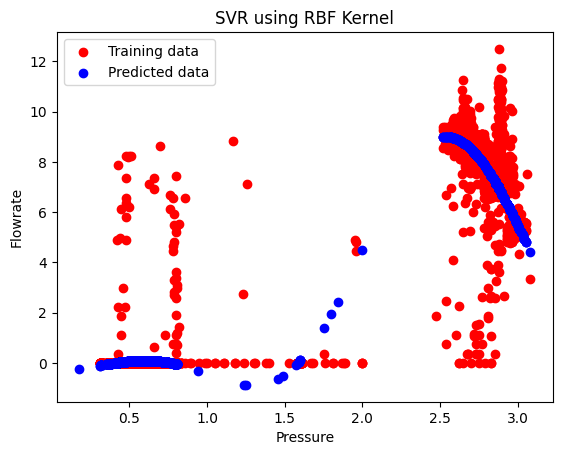

In [4]:
# Reading the dataset
df = pd.read_excel('ph0100(2).xlsx')
df = df.drop('created_at', axis=1)
df = df.drop('entry_id', axis=1)
df_binary = df[['pressure', 'flowrate_manual']]
# df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure']).reshape(-1, 1)
y = np.array(df_binary['flowrate_manual']).reshape(-1, 1)
# X = df_binary.iloc[:, -1].values
# y = df_binary.iloc[:, 0].values

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Fitting the Regression Model to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

# predicting the test set results
y_pred = regressor.predict(X_test)
y_pred = y_pred.reshape(-1, 1)

# Visualising the SVR results
plt.scatter(X_train, y_train, color = 'red')
plt.scatter(X_test, regressor.predict(X_test), color = 'blue')
# legend
plt.legend(['Training data', 'Predicted data'])
# axis labels
plt.xlabel('Pressure')
plt.ylabel('Flowrate')
# title
plt.title('SVR using RBF Kernel')

# Check accuracy
from sklearn.metrics import r2_score
print('Accuracy: ', r2_score(y_test, y_pred))

# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', rms)


c:\Users\gandh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  0.9602930942099236
RMSE:  0.7353744060976133


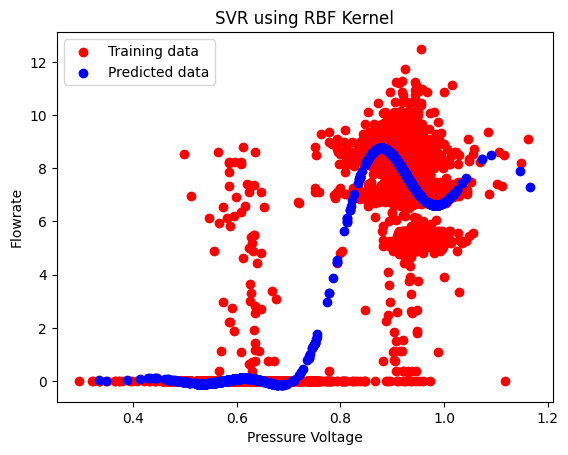

In [19]:
# Reading the dataset
df = pd.read_excel('ph0100(2).xlsx')
df = df.drop('created_at', axis=1)
df = df.drop('entry_id', axis=1)
df_binary = df[['pressure voltage', 'flowrate_manual']]
# df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure voltage']).reshape(-1, 1)
y = np.array(df_binary['flowrate_manual']).reshape(-1, 1)
# X = df_binary.iloc[:, -1].values
# y = df_binary.iloc[:, 0].values

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Fitting the Regression Model to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

# predicting the test set results
y_pred = regressor.predict(X_test)
y_pred = y_pred.reshape(-1, 1)

# Visualising the SVR results
plt.scatter(X_train, y_train, color = 'red')
plt.scatter(X_test, regressor.predict(X_test), color = 'blue')
# legend
plt.legend(['Training data', 'Predicted data'])
# axis labels
plt.xlabel('Pressure Voltage')
plt.ylabel('Flowrate')
# title
plt.title('SVR using RBF Kernel')

# Check accuracy
from sklearn.metrics import r2_score
print('Accuracy: ', r2_score(y_test, y_pred))

# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', rms)


c:\Users\gandh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  0.9856747245035185
RMSE:  0.1303148851344679


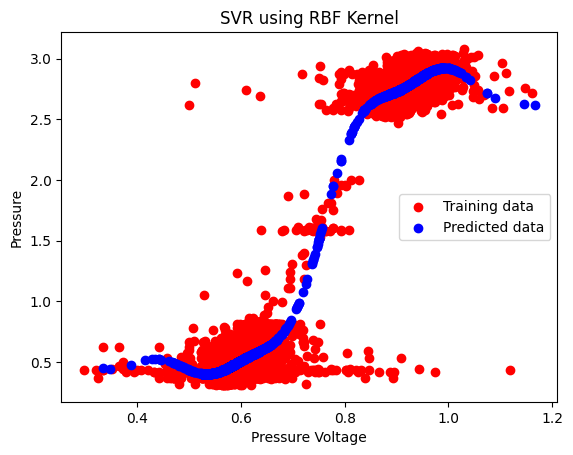

In [20]:
# Reading the dataset
df = pd.read_excel('ph0100(2).xlsx')
df = df.drop('created_at', axis=1)
df = df.drop('entry_id', axis=1)
df_binary = df[['pressure voltage', 'pressure']]
# df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure voltage']).reshape(-1, 1)
y = np.array(df_binary['pressure']).reshape(-1, 1)
# X = df_binary.iloc[:, -1].values
# y = df_binary.iloc[:, 0].values

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Fitting the Regression Model to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

# predicting the test set results
y_pred = regressor.predict(X_test)
y_pred = y_pred.reshape(-1, 1)

# Visualising the SVR results
plt.scatter(X_train, y_train, color = 'red')
plt.scatter(X_test, regressor.predict(X_test), color = 'blue')
# legend
plt.legend(['Training data', 'Predicted data'])
# axis labels
plt.xlabel('Pressure Voltage')
plt.ylabel('Pressure')
# title
plt.title('SVR using RBF Kernel')

# Check accuracy
from sklearn.metrics import r2_score
print('Accuracy: ', r2_score(y_test, y_pred))

# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', rms)


## PH0303(2)

c:\Users\gandh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  0.9498529076173714
RMSE:  0.5031209610145982


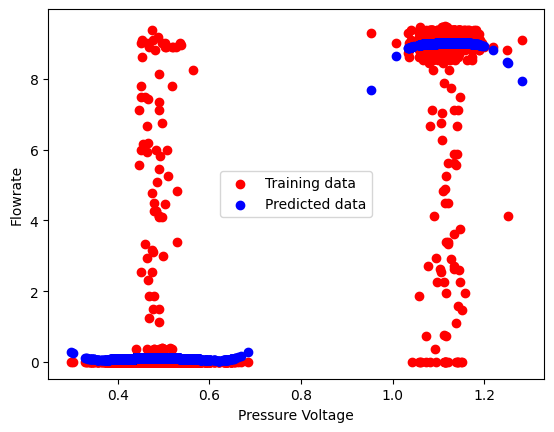

In [8]:
# Reading the dataset
df = pd.read_excel('ph0303(2).xlsx')
df = df.drop('created_at', axis=1)
df = df.drop('entry_id', axis=1)
df_binary = df[['pressure voltage', 'flowrate_manual']]
# df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure voltage']).reshape(-1, 1)
y = np.array(df_binary['flowrate_manual']).reshape(-1, 1)
# X = df_binary.iloc[:, -1].values
# y = df_binary.iloc[:, 0].values


# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Fitting the Regression Model to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

# predicting the test set results
y_pred = regressor.predict(X_test)
y_pred = y_pred.reshape(-1, 1)

# Visualising the SVR results
plt.scatter(X_train, y_train, color = 'red')
plt.scatter(X_train, regressor.predict(X_train), color = 'blue')
# legend
plt.legend(['Training data', 'Predicted data'])
# axis labels
plt.xlabel('Pressure Voltage')
plt.ylabel('Flowrate')

# Check accuracy
from sklearn.metrics import r2_score
print('Accuracy: ', r2_score(y_test, y_pred))

# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', rms)


## PH0302(2)

c:\Users\gandh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  0.9516945021898651
RMSE:  0.44873381091472697


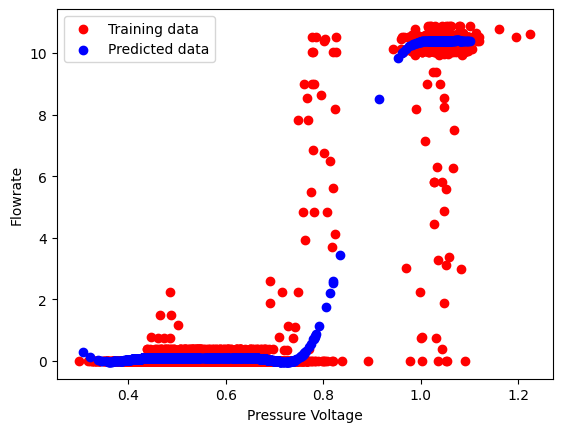

In [11]:
# Reading the dataset
df = pd.read_excel('ph0302(2).xlsx')
df = df.drop('created_at', axis=1)
df = df.drop('entry_id', axis=1)
df_binary = df[['pressure voltage', 'flowrate_manual']]
# df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure voltage']).reshape(-1, 1)
y = np.array(df_binary['flowrate_manual']).reshape(-1, 1)
# X = df_binary.iloc[:, -1].values
# y = df_binary.iloc[:, 0].values


# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Fitting the Regression Model to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

# predicting the test set results
y_pred = regressor.predict(X_test)
y_pred = y_pred.reshape(-1, 1)

# Visualising the SVR results
plt.scatter(X_train, y_train, color = 'red')
plt.scatter(X_test, regressor.predict(X_test), color = 'blue')
# legend
plt.legend(['Training data', 'Predicted data'])
# axis labels
plt.xlabel('Pressure Voltage')
plt.ylabel('Flowrate')

# Check accuracy
from sklearn.metrics import r2_score
print('Accuracy: ', r2_score(y_test, y_pred))

# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', rms)


# CNN

PH0100

Epoch 1/100
658/658 [==============================] - 2s 2ms/step - loss: 0.6565 - mean_absolute_error: 0.6565 - mean_squared_error: 2.3545 - val_loss: 0.4185 - val_mean_absolute_error: 0.4185 - val_mean_squared_error: 0.7760
Epoch 2/100
658/658 [==============================] - 1s 1ms/step - loss: 0.4225 - mean_absolute_error: 0.4225 - mean_squared_error: 0.8619 - val_loss: 0.4197 - val_mean_absolute_error: 0.4197 - val_mean_squared_error: 0.8840
Epoch 3/100
658/658 [==============================] - 1s 1ms/step - loss: 0.4190 - mean_absolute_error: 0.4190 - mean_squared_error: 0.8565 - val_loss: 0.4177 - val_mean_absolute_error: 0.4177 - val_mean_squared_error: 0.7676
Epoch 4/100
658/658 [==============================] - 1s 1ms/step - loss: 0.4160 - mean_absolute_error: 0.4160 - mean_squared_error: 0.8377 - val_loss: 0.4094 - val_mean_absolute_error: 0.4094 - val_mean_squared_error: 0.7559
Epoch 5/100
658/658 [==============================] - 1s 1ms/step - loss: 0.4128 - mean_abs

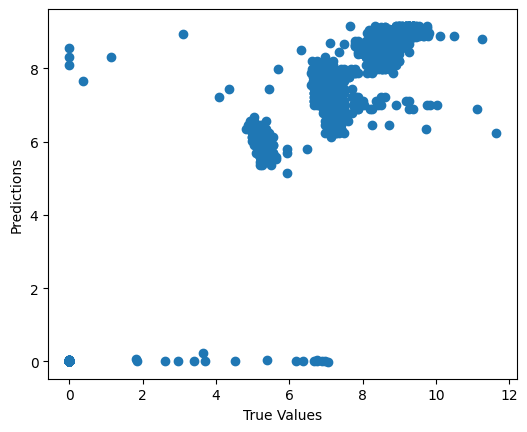

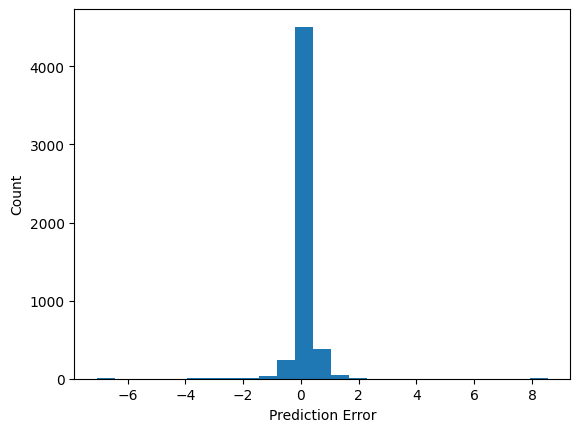

In [13]:
# CNN with 2 layers, ReLU activation, and 1 L2 loss
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Reading the dataset
df = pd.read_excel('ph0100(2).xlsx')
df = df.drop('created_at', axis=1)
df = df.drop('entry_id', axis=1)
df_binary = df[['pressure', 'flowrate_manual']]
# df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure']).reshape(-1, 1)
y = np.array(df_binary['flowrate_manual']).reshape(-1, 1)
# X = df_binary.iloc[:, -1].values
# y = df_binary.iloc[:, 0].values

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# CNN
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[1]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mean_absolute_error',
    metrics=['mean_absolute_error', 'mean_squared_error'])

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=100)

# Predictions
test_predictions = model.predict(X_test).flatten()

# Plotting the predictions
fig = plt.figure()
a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

# Error distribution
fig = plt.figure()
test_predictions = test_predictions.reshape(-1, 1)
error = test_predictions - y_test
plt.hist(error, bins = 25)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')



In [14]:
# Score of CNN
from sklearn.metrics import r2_score
print('Accuracy: ', r2_score(y_test, test_predictions))

# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, test_predictions))
print('RMSE: ', rms)

Accuracy:  0.9810330285112336
RMSE:  0.5082466018457447


Epoch 1/100
658/658 [==============================] - 2s 2ms/step - loss: 1.3019 - mean_absolute_error: 1.3019 - mean_squared_error: 7.8240 - val_loss: 0.4942 - val_mean_absolute_error: 0.4942 - val_mean_squared_error: 0.9984
Epoch 2/100
658/658 [==============================] - 1s 1ms/step - loss: 0.4794 - mean_absolute_error: 0.4794 - mean_squared_error: 1.0053 - val_loss: 0.4675 - val_mean_absolute_error: 0.4675 - val_mean_squared_error: 0.9794
Epoch 3/100
658/658 [==============================] - 1s 1ms/step - loss: 0.4518 - mean_absolute_error: 0.4518 - mean_squared_error: 0.9770 - val_loss: 0.4484 - val_mean_absolute_error: 0.4484 - val_mean_squared_error: 0.9456
Epoch 4/100
658/658 [==============================] - 1s 1ms/step - loss: 0.4434 - mean_absolute_error: 0.4434 - mean_squared_error: 0.9620 - val_loss: 0.4394 - val_mean_absolute_error: 0.4394 - val_mean_squared_error: 0.9429
Epoch 5/100
658/658 [==============================] - 1s 1ms/step - loss: 0.4354 - mean_abs

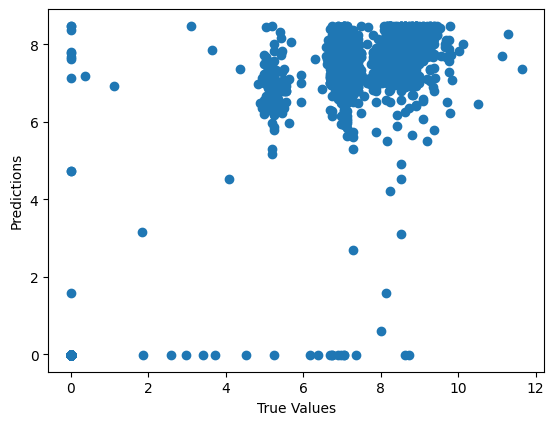

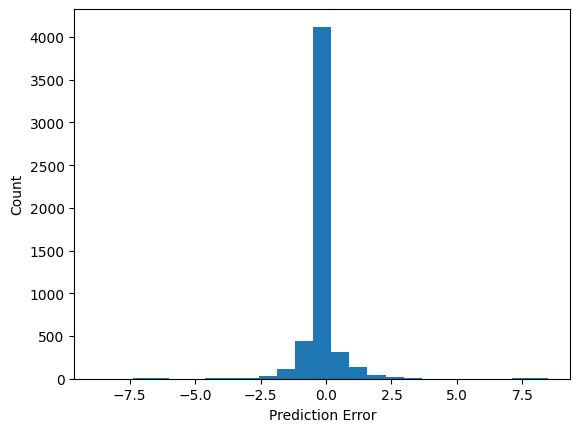

In [15]:
# CNN with 2 layers, ReLU activation, and 1 L2 loss
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Reading the dataset
df = pd.read_excel('ph0100(2).xlsx')
df = df.drop('created_at', axis=1)
df = df.drop('entry_id', axis=1)
df_binary = df[['pressure voltage', 'flowrate_manual']]
# df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure voltage']).reshape(-1, 1)
y = np.array(df_binary['flowrate_manual']).reshape(-1, 1)
# X = df_binary.iloc[:, -1].values
# y = df_binary.iloc[:, 0].values

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# CNN
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[1]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mean_absolute_error',
    metrics=['mean_absolute_error', 'mean_squared_error'])

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=100)

# Predictions
test_predictions = model.predict(X_test).flatten()

# Plotting the predictions
fig = plt.figure()
a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

# Error distribution
fig = plt.figure()
test_predictions = test_predictions.reshape(-1, 1)
error = test_predictions - y_test
plt.hist(error, bins = 25)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

# Score of CNN
from sklearn.metrics import r2_score
print('Accuracy: ', r2_score(y_test, test_predictions))

# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, test_predictions))
print('RMSE: ', rms)

Epoch 1/100
658/658 [==============================] - 1s 2ms/step - loss: 0.3083 - mean_absolute_error: 0.3083 - mean_squared_error: 0.4467 - val_loss: 0.0807 - val_mean_absolute_error: 0.0807 - val_mean_squared_error: 0.0242
Epoch 2/100
658/658 [==============================] - 1s 1ms/step - loss: 0.0786 - mean_absolute_error: 0.0786 - mean_squared_error: 0.0220 - val_loss: 0.0816 - val_mean_absolute_error: 0.0816 - val_mean_squared_error: 0.0247
Epoch 3/100
658/658 [==============================] - 1s 1ms/step - loss: 0.0768 - mean_absolute_error: 0.0768 - mean_squared_error: 0.0213 - val_loss: 0.0762 - val_mean_absolute_error: 0.0762 - val_mean_squared_error: 0.0231
Epoch 4/100
658/658 [==============================] - 1s 1ms/step - loss: 0.0750 - mean_absolute_error: 0.0750 - mean_squared_error: 0.0205 - val_loss: 0.0762 - val_mean_absolute_error: 0.0762 - val_mean_squared_error: 0.0228
Epoch 5/100
658/658 [==============================] - 1s 1ms/step - loss: 0.0727 - mean_abs

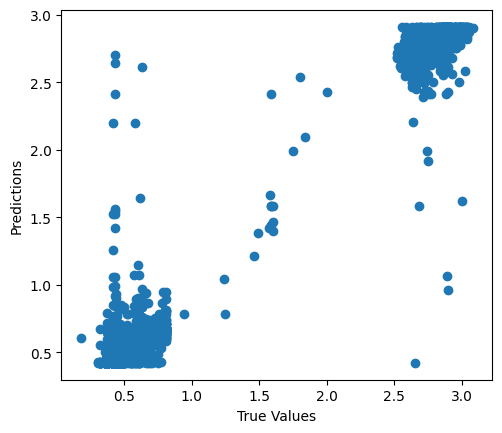

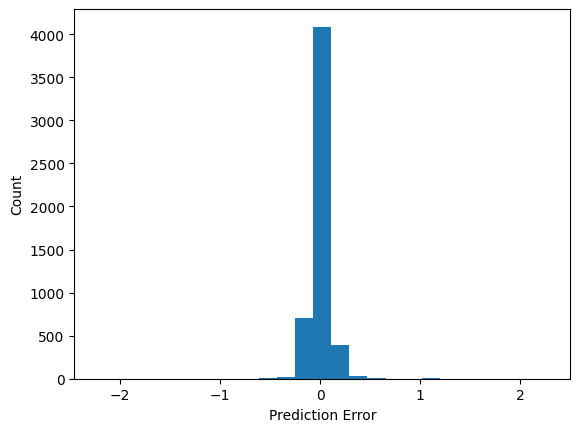

In [16]:
# CNN with 2 layers, ReLU activation, and 1 L2 loss
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Reading the dataset
df = pd.read_excel('ph0100(2).xlsx')
df = df.drop('created_at', axis=1)
df = df.drop('entry_id', axis=1)
df_binary = df[['pressure voltage', 'pressure']]
# df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure voltage']).reshape(-1, 1)
y = np.array(df_binary['pressure']).reshape(-1, 1)
# X = df_binary.iloc[:, -1].values
# y = df_binary.iloc[:, 0].values

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# CNN
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[1]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mean_absolute_error',
    metrics=['mean_absolute_error', 'mean_squared_error'])

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=100)

# Predictions
test_predictions = model.predict(X_test).flatten()

# Plotting the predictions
fig = plt.figure()
a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

# Error distribution
fig = plt.figure()
test_predictions = test_predictions.reshape(-1, 1)
error = test_predictions - y_test
plt.hist(error, bins = 25)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

# Score of CNN
from sklearn.metrics import r2_score
print('Accuracy: ', r2_score(y_test, test_predictions))

# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, test_predictions))
print('RMSE: ', rms)

## Ph0303(2)

Epoch 1/100
656/656 [==============================] - 2s 2ms/step - loss: 0.4929 - mean_absolute_error: 0.4929 - mean_squared_error: 3.9252 - val_loss: 0.0840 - val_mean_absolute_error: 0.0840 - val_mean_squared_error: 0.2602
Epoch 2/100
656/656 [==============================] - 1s 1ms/step - loss: 0.0727 - mean_absolute_error: 0.0727 - mean_squared_error: 0.2937 - val_loss: 0.0719 - val_mean_absolute_error: 0.0719 - val_mean_squared_error: 0.2577
Epoch 3/100
656/656 [==============================] - 1s 1ms/step - loss: 0.0687 - mean_absolute_error: 0.0687 - mean_squared_error: 0.2942 - val_loss: 0.0683 - val_mean_absolute_error: 0.0683 - val_mean_squared_error: 0.2700
Epoch 4/100
656/656 [==============================] - 1s 1ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_squared_error: 0.2924 - val_loss: 0.0668 - val_mean_absolute_error: 0.0668 - val_mean_squared_error: 0.2648
Epoch 5/100
656/656 [==============================] - 1s 1ms/step - loss: 0.0678 - mean_abs

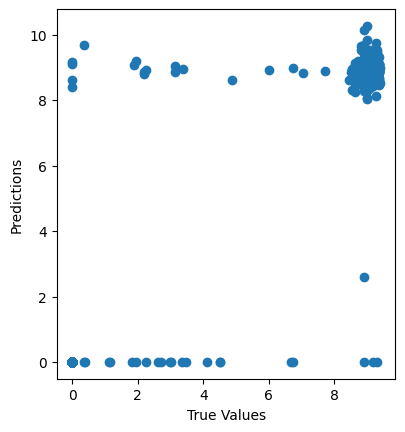

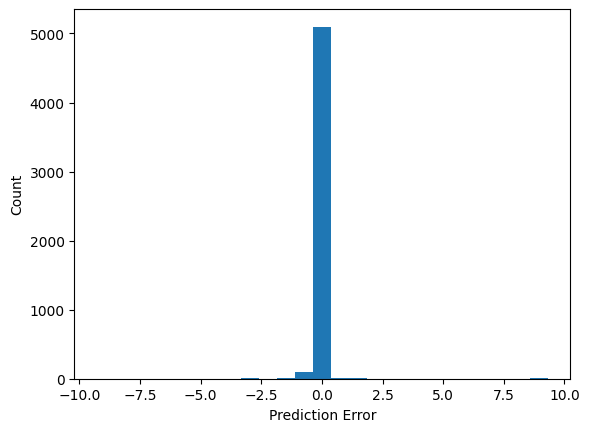

In [17]:
# CNN with 2 layers, ReLU activation, and 1 L2 loss
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Reading the dataset
df = pd.read_excel('ph0303(2).xlsx')
df = df.drop('created_at', axis=1)
df = df.drop('entry_id', axis=1)
df_binary = df[['pressure voltage', 'flowrate_manual']]
# df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure voltage']).reshape(-1, 1)
y = np.array(df_binary['flowrate_manual']).reshape(-1, 1)
# X = df_binary.iloc[:, -1].values
# y = df_binary.iloc[:, 0].values

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# CNN
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[1]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mean_absolute_error',
    metrics=['mean_absolute_error', 'mean_squared_error'])

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=100)

# Predictions
test_predictions = model.predict(X_test).flatten()

# Plotting the predictions
fig = plt.figure()
a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

# Error distribution
fig = plt.figure()
test_predictions = test_predictions.reshape(-1, 1)
error = test_predictions - y_test
plt.hist(error, bins = 25)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

# Score of CNN
from sklearn.metrics import r2_score
print('Accuracy: ', r2_score(y_test, test_predictions))

# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, test_predictions))
print('RMSE: ', rms)

## PH0302(2)

Epoch 1/100
666/666 [==============================] - 1s 2ms/step - loss: 0.4109 - mean_absolute_error: 0.4109 - mean_squared_error: 4.1280 - val_loss: 0.4221 - val_mean_absolute_error: 0.4221 - val_mean_squared_error: 4.1861
Epoch 2/100
666/666 [==============================] - 1s 1ms/step - loss: 0.3153 - mean_absolute_error: 0.3153 - mean_squared_error: 2.4326 - val_loss: 0.1055 - val_mean_absolute_error: 0.1055 - val_mean_squared_error: 0.2474
Epoch 3/100
666/666 [==============================] - 1s 2ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_squared_error: 0.1649 - val_loss: 0.0603 - val_mean_absolute_error: 0.0603 - val_mean_squared_error: 0.2163
Epoch 4/100
666/666 [==============================] - 1s 1ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_squared_error: 0.1683 - val_loss: 0.0612 - val_mean_absolute_error: 0.0612 - val_mean_squared_error: 0.2207
Epoch 5/100
666/666 [==============================] - 1s 2ms/step - loss: 0.0554 - mean_abs

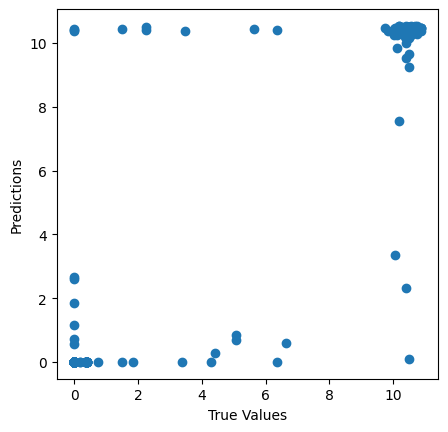

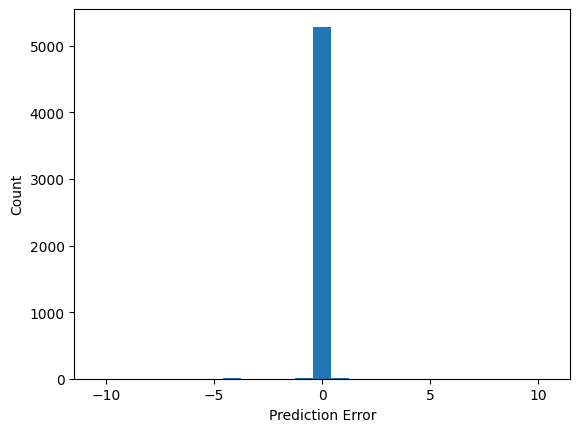

In [18]:
# CNN with 2 layers, ReLU activation, and 1 L2 loss
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Reading the dataset
df = pd.read_excel('ph0302(2).xlsx')
df = df.drop('created_at', axis=1)
df = df.drop('entry_id', axis=1)
df_binary = df[['pressure voltage', 'flowrate_manual']]
# df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure voltage']).reshape(-1, 1)
y = np.array(df_binary['flowrate_manual']).reshape(-1, 1)
# X = df_binary.iloc[:, -1].values
# y = df_binary.iloc[:, 0].values

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# CNN
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[1]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mean_absolute_error',
    metrics=['mean_absolute_error', 'mean_squared_error'])

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=100)

# Predictions
test_predictions = model.predict(X_test).flatten()

# Plotting the predictions
fig = plt.figure()
a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

# Error distribution
fig = plt.figure()
test_predictions = test_predictions.reshape(-1, 1)
error = test_predictions - y_test
plt.hist(error, bins = 25)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

# Score of CNN
from sklearn.metrics import r2_score
print('Accuracy: ', r2_score(y_test, test_predictions))

# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, test_predictions))
print('RMSE: ', rms)